In [7]:
from google.colab import files
files.upload()

Saving test-32data.save to test-32data.save


您的单元格大小接近上限 (9M)。较大的新输出项可能会被舍弃。目前已舍弃 11.8M 个输出项。 

In [0]:
import json
import pickle

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.layers import *
from keras.models import Sequential
from keras.models import model_from_json
from keras.optimizers import Adam

np.random.seed(1234)

In [0]:
def get_image_data(num_training=1000, num_validation=0, num_test=202):
    """
    Load the image dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.
    """
    # Load the raw image data
    image_dir = "gesture-32data.save"

    data = pickle.load(open(image_dir, 'rb'))
    X_train, y_train, X_test, y_test = data['label'][:1000],data['gesture'][:1000],data['label'][1000:],data['gesture'][1000:]
    X_train=np.array(X_train,'float64')
    y_train= np.array(y_train,'float64')
    X_test=np.array(X_test,'float64')
    y_test=np.array(y_test,'float64')
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
   

    # Normalize the data: subtract the mean image
    #mean_image = np.mean(X_train, axis=0)
    #X_train -= mean_image
    #X_val -= mean_image
    #X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test
  

In [257]:
X_train, y_train, X_val, y_val, X_test, y_test = get_image_data()
#y_train=y_train.reshape(-1,42)
#y_val=y_val.reshape(-1,42)
#y_test=y_test.reshape(-1,42)
X_train.shape = (1000,21,2,1)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

model = Sequential([
    Convolution2D(
        nb_filter=12,
        nb_row=4,
        nb_col=2,
        subsample=(1, 1),
        input_shape=(21, 2, 1)
    ),
    LeakyReLU(
        alpha=0.05
    ),
    #Convolution2D(
        #nb_filter=12,
        #nb_row=5,
        #nb_col=5,
        #subsample=(2, 2),
    #),
    #LeakyReLU(
        #alpha=0.05
    #),
     Convolution2D(
        nb_filter=12,
        nb_row=4,
        nb_col=1,
     ),
     LeakyReLU(
        alpha=0.05
     ),
    Flatten(),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
#         Dense(
#             output_dim=30,
#         ),
    Dense(
        output_dim=1,
#             weights=(pca_eigenvectors, pca_mean),
        trainable=False
    )
])

model.compile(
    optimizer=Adam(),
    loss='mse'
)

model.fit(
    X_train,
    y_train,
    batch_size=50,
    epochs=1000,
)

Train data shape:  (1000, 21, 2, 1)
Train labels shape:  (1000, 1)
Validation data shape:  (0, 21, 2)
Validation labels shape:  (0, 1)
Test data shape:  (202, 21, 2)
Test labels shape:  (202, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(21, 2, 1), kernel_size=(4, 2), filters=12, strides=(1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(2, 1), filters=12)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(trainable=False, units=1)`


Epoch 1/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 16830.7459
Epoch 2/1000
1000/1000 [==============================] - 0s 207us/step - loss: 129.2860
Epoch 3/1000
1000/1000 [==============================] - 0s 195us/step - loss: 5.1053
Epoch 4/1000
1000/1000 [==============================] - 0s 196us/step - loss: 1.6959
Epoch 5/1000
1000/1000 [==============================] - 0s 208us/step - loss: 1.0947
Epoch 6/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.9492
Epoch 7/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.8551
Epoch 8/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.7502
Epoch 9/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.6710
Epoch 10/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.6291
Epoch 11/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.5829
Epoch 12/1000
1000/1000 [============

1000/1000 [==============================] - 0s 193us/step - loss: 0.3802
Epoch 20/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.3578
Epoch 21/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.3589
Epoch 22/1000
1000/1000 [==============================] - 0s 188us/step - loss: 0.3476
Epoch 23/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.3353
Epoch 24/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.3203
Epoch 25/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.3163
Epoch 26/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.3112
Epoch 27/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.2956
Epoch 28/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.2946
Epoch 29/1000
1000/1000 [==============================] - 0s 208us/step - loss: 0.2841
Epoch 30/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 196us/step - loss: 0.2502
Epoch 38/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.2593
Epoch 39/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.2592
Epoch 40/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.2483
Epoch 41/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.2402
Epoch 42/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.2360
Epoch 43/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.2225
Epoch 44/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.2179
Epoch 45/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.2132
Epoch 46/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.2127
Epoch 47/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.2099
Epoch 48/1000
1000/1000 [=====================

1000/1000 [==============================] - 0s 203us/step - loss: 0.1931
Epoch 57/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.1914
Epoch 58/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1941
Epoch 59/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1960
Epoch 60/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.1918
Epoch 61/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.1825
Epoch 62/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1831
Epoch 63/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.1955
Epoch 64/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.1857
Epoch 65/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1833
Epoch 66/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1791
Epoch 67/1000
1000/1000 [=====================

Epoch 75/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1648
Epoch 76/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1607
Epoch 77/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.1570
Epoch 78/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1690
Epoch 79/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1673
Epoch 80/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1700
Epoch 81/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1544
Epoch 82/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1637
Epoch 83/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.1591
Epoch 84/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1574
Epoch 85/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1571
Epoch 86/1000
1000/1000 [=======

1000/1000 [==============================] - 0s 197us/step - loss: 0.1412
Epoch 95/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1432
Epoch 96/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1521
Epoch 97/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1424
Epoch 98/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1435
Epoch 99/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1398
Epoch 100/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1768
Epoch 101/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1443
Epoch 102/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.1588
Epoch 103/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1374
Epoch 104/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.1467
Epoch 105/1000
1000/1000 [===============

Epoch 113/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.1562
Epoch 114/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1460
Epoch 115/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1405
Epoch 116/1000
1000/1000 [==============================] - 0s 185us/step - loss: 0.1180
Epoch 117/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1373
Epoch 118/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.1233
Epoch 119/1000
1000/1000 [==============================] - 0s 185us/step - loss: 0.1319
Epoch 120/1000
1000/1000 [==============================] - 0s 179us/step - loss: 0.1426
Epoch 121/1000
1000/1000 [==============================] - 0s 181us/step - loss: 0.1322
Epoch 122/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1293
Epoch 123/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.1216
Epoch 124/1000
1000/1

1000/1000 [==============================] - 0s 210us/step - loss: 0.1498
Epoch 133/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1396
Epoch 134/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1281
Epoch 135/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.1209
Epoch 136/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1311
Epoch 137/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1177
Epoch 138/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.1291
Epoch 139/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1362
Epoch 140/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.1205
Epoch 141/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1303
Epoch 142/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1151
Epoch 143/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 203us/step - loss: 0.1405
Epoch 151/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1241
Epoch 152/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1187
Epoch 153/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.1155
Epoch 154/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1323
Epoch 155/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1335
Epoch 156/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1300
Epoch 157/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1125
Epoch 158/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1177
Epoch 159/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1625
Epoch 160/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.1423
Epoch 161/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 191us/step - loss: 0.1033
Epoch 169/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1216
Epoch 170/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1350
Epoch 171/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1121
Epoch 172/1000
1000/1000 [==============================] - 0s 186us/step - loss: 0.1299
Epoch 173/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.1991
Epoch 174/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1382
Epoch 175/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1151
Epoch 176/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1038
Epoch 177/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.1012
Epoch 178/1000
1000/1000 [==============================] - 0s 189us/step - loss: 0.1087
Epoch 179/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 200us/step - loss: 0.1395
Epoch 187/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1008
Epoch 188/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1131
Epoch 189/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0920
Epoch 190/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0988
Epoch 191/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.0922
Epoch 192/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1040
Epoch 193/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1123
Epoch 194/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1150
Epoch 195/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.1369
Epoch 196/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1141
Epoch 197/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 209us/step - loss: 0.0918
Epoch 205/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1242
Epoch 206/1000
1000/1000 [==============================] - 0s 208us/step - loss: 0.1620
Epoch 207/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1766
Epoch 208/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.1903
Epoch 209/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.3867
Epoch 210/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.3158
Epoch 211/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1491
Epoch 212/1000
1000/1000 [==============================] - 0s 225us/step - loss: 0.1199
Epoch 213/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1042
Epoch 214/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.1108
Epoch 215/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 192us/step - loss: 0.1372
Epoch 223/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1823
Epoch 224/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1990
Epoch 225/1000
1000/1000 [==============================] - 0s 189us/step - loss: 0.1715
Epoch 226/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1030
Epoch 227/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1118
Epoch 228/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.1000
Epoch 229/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1044
Epoch 230/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.1228
Epoch 231/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.2179
Epoch 232/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1150
Epoch 233/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 194us/step - loss: 0.5275
Epoch 242/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.4570
Epoch 243/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.2759
Epoch 244/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.2621
Epoch 245/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1198
Epoch 246/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1120
Epoch 247/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1317
Epoch 248/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1622
Epoch 249/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.2248
Epoch 250/1000
1000/1000 [==============================] - 0s 210us/step - loss: 0.2328
Epoch 251/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.3884
Epoch 252/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 210us/step - loss: 0.1122
Epoch 260/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.2118
Epoch 261/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1487
Epoch 262/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.2519
Epoch 263/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1350
Epoch 264/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.1175
Epoch 265/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1661
Epoch 266/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1432
Epoch 267/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1685
Epoch 268/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1318
Epoch 269/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.3847
Epoch 270/1000
1000/1000 [==========

Epoch 277/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.7635
Epoch 278/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.3105
Epoch 279/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1634
Epoch 280/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1938
Epoch 281/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.1983
Epoch 282/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.2367
Epoch 283/1000
1000/1000 [==============================] - 0s 211us/step - loss: 0.5718
Epoch 284/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.4907
Epoch 285/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.3198
Epoch 286/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.2864
Epoch 287/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.2877
Epoch 288/1000
1000/1

1000/1000 [==============================] - 0s 197us/step - loss: 0.2422
Epoch 297/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1664
Epoch 298/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.0781
Epoch 299/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.1402
Epoch 300/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.8190
Epoch 301/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.8830
Epoch 302/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.6657
Epoch 303/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.6416
Epoch 304/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.2461
Epoch 305/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.2481
Epoch 306/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.1234
Epoch 307/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 205us/step - loss: 0.1604
Epoch 315/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.1507
Epoch 316/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1843
Epoch 317/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.3061
Epoch 318/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.3579
Epoch 319/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.2243
Epoch 320/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.2156
Epoch 321/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1331
Epoch 322/1000
1000/1000 [==============================] - 0s 188us/step - loss: 0.1848
Epoch 323/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1938
Epoch 324/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1838
Epoch 325/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 206us/step - loss: 0.2119
Epoch 333/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.2432
Epoch 334/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.1916
Epoch 335/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1410
Epoch 336/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0943
Epoch 337/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1131
Epoch 338/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1482
Epoch 339/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1764
Epoch 340/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.1971
Epoch 341/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.1467
Epoch 342/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1362
Epoch 343/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 200us/step - loss: 0.5182
Epoch 351/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.2786
Epoch 352/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1969
Epoch 353/1000
1000/1000 [==============================] - 0s 186us/step - loss: 0.1882
Epoch 354/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.2528
Epoch 355/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.5255
Epoch 356/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.5100
Epoch 357/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.6114
Epoch 358/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.6132
Epoch 359/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.7179
Epoch 360/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.3756
Epoch 361/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 198us/step - loss: 0.1142
Epoch 369/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1518
Epoch 370/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1141
Epoch 371/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0796
Epoch 372/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.1385
Epoch 373/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.1281
Epoch 374/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.0943
Epoch 375/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1024
Epoch 376/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1115
Epoch 377/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1948
Epoch 378/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.1001
Epoch 379/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 187us/step - loss: 0.1226
Epoch 387/1000
1000/1000 [==============================] - 0s 188us/step - loss: 0.1302
Epoch 388/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1450
Epoch 389/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1003
Epoch 390/1000
1000/1000 [==============================] - 0s 208us/step - loss: 0.0864
Epoch 391/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.0775
Epoch 392/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1160
Epoch 393/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.2024
Epoch 394/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.4435
Epoch 395/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.4216
Epoch 396/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.2903
Epoch 397/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 202us/step - loss: 0.1150
Epoch 405/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1307
Epoch 406/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.2220
Epoch 407/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.1572
Epoch 408/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1454
Epoch 409/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1661
Epoch 410/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0907
Epoch 411/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0759
Epoch 412/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0716
Epoch 413/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0827
Epoch 414/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0836
Epoch 415/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 200us/step - loss: 0.1268
Epoch 423/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.0807
Epoch 424/1000
1000/1000 [==============================] - 0s 219us/step - loss: 0.0925
Epoch 425/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0967
Epoch 426/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.0817
Epoch 427/1000
1000/1000 [==============================] - 0s 212us/step - loss: 0.0746
Epoch 428/1000
1000/1000 [==============================] - 0s 213us/step - loss: 0.0806
Epoch 429/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1816
Epoch 430/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.1040
Epoch 431/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0999
Epoch 432/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0685
Epoch 433/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 201us/step - loss: 0.1442
Epoch 441/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1366
Epoch 442/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0978
Epoch 443/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0963
Epoch 444/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0725
Epoch 445/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0752
Epoch 446/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.1173
Epoch 447/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0878
Epoch 448/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0786
Epoch 449/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0742
Epoch 450/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1096
Epoch 451/1000
1000/1000 [==========

Epoch 459/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1015
Epoch 460/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.0759
Epoch 461/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1452
Epoch 462/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1077
Epoch 463/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1048
Epoch 464/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0863
Epoch 465/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0895
Epoch 466/1000
1000/1000 [==============================] - 0s 210us/step - loss: 0.0686
Epoch 467/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0742
Epoch 468/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.1913
Epoch 469/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1329
Epoch 470/1000
1000/1

1000/1000 [==============================] - 0s 200us/step - loss: 0.0628
Epoch 478/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0759
Epoch 479/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0792
Epoch 480/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1633
Epoch 481/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1012
Epoch 482/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0783
Epoch 483/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0639
Epoch 484/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0883
Epoch 485/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1260
Epoch 486/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1190
Epoch 487/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1103
Epoch 488/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 195us/step - loss: 0.0867
Epoch 497/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1524
Epoch 498/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.1891
Epoch 499/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1263
Epoch 500/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1063
Epoch 501/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0688
Epoch 502/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0551
Epoch 503/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0557
Epoch 504/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.0645
Epoch 505/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0755
Epoch 506/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0811
Epoch 507/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 196us/step - loss: 0.0769
Epoch 516/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0919
Epoch 517/1000
1000/1000 [==============================] - 0s 178us/step - loss: 0.0847
Epoch 518/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.0687
Epoch 519/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0592
Epoch 520/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1079
Epoch 521/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0973
Epoch 522/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0758
Epoch 523/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1126
Epoch 524/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1184
Epoch 525/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0806
Epoch 526/1000
1000/1000 [==========

Epoch 534/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0928
Epoch 535/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1351
Epoch 536/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1333
Epoch 537/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1295
Epoch 538/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1499
Epoch 539/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1364
Epoch 540/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.1159
Epoch 541/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1032
Epoch 542/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0949
Epoch 543/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.0934
Epoch 544/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0914
Epoch 545/1000
1000/1


1000/1000 [==============================] - 0s 203us/step - loss: 0.0692
Epoch 554/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0601
Epoch 555/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.0545
Epoch 556/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0606
Epoch 557/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0648
Epoch 558/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0605
Epoch 559/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0814
Epoch 560/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.0708
Epoch 561/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.0801
Epoch 562/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0586
Epoch 563/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0563
Epoch 564/1000
1000/1000 [=========

1000/1000 [==============================] - 0s 196us/step - loss: 0.0618
Epoch 573/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.0563
Epoch 574/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.0716
Epoch 575/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.0816
Epoch 576/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0999
Epoch 577/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0959
Epoch 578/1000
1000/1000 [==============================] - 0s 208us/step - loss: 0.1171
Epoch 579/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0983
Epoch 580/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.0861
Epoch 581/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0950
Epoch 582/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0857
Epoch 583/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 206us/step - loss: 0.1198
Epoch 591/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0975
Epoch 592/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.0967
Epoch 593/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1138
Epoch 594/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1750
Epoch 595/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.2407
Epoch 596/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1735
Epoch 597/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1515
Epoch 598/1000
1000/1000 [==============================] - 0s 189us/step - loss: 0.1327
Epoch 599/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.1100
Epoch 600/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1186
Epoch 601/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 196us/step - loss: 0.1175
Epoch 609/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.1152
Epoch 610/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1097
Epoch 611/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0898
Epoch 612/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1121
Epoch 613/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0965
Epoch 614/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1001
Epoch 615/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0892
Epoch 616/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.1039
Epoch 617/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1011
Epoch 618/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.1219
Epoch 619/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 201us/step - loss: 0.1029
Epoch 626/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0866
Epoch 627/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0813
Epoch 628/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.0789
Epoch 629/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0731
Epoch 630/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0792
Epoch 631/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.0785
Epoch 632/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0657
Epoch 633/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0617
Epoch 634/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0603
Epoch 635/1000
1000/1000 [==============================] - 0s 208us/step - loss: 0.0576
Epoch 636/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 216us/step - loss: 0.0772
Epoch 644/1000
1000/1000 [==============================] - 0s 208us/step - loss: 0.0834
Epoch 645/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.0838
Epoch 646/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0843
Epoch 647/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.0693
Epoch 648/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.0872
Epoch 649/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0829
Epoch 650/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0750
Epoch 651/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0780
Epoch 652/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0623
Epoch 653/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0619
Epoch 654/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 197us/step - loss: 0.0591
Epoch 662/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0561
Epoch 663/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0529
Epoch 664/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0601
Epoch 665/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.0672
Epoch 666/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0780
Epoch 667/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.0773
Epoch 668/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0737
Epoch 669/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0750
Epoch 670/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0686
Epoch 671/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0666
Epoch 672/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 199us/step - loss: 0.0787
Epoch 680/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.1130
Epoch 681/1000
1000/1000 [==============================] - 0s 214us/step - loss: 0.1123
Epoch 682/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1363
Epoch 683/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1382
Epoch 684/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.2040
Epoch 685/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1998
Epoch 686/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.2431
Epoch 687/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.2498
Epoch 688/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.2645
Epoch 689/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.2463
Epoch 690/1000
1000/1000 [==========


1000/1000 [==============================] - 0s 200us/step - loss: 0.1355
Epoch 698/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1223
Epoch 699/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1182
Epoch 700/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.1672
Epoch 701/1000
1000/1000 [==============================] - 0s 187us/step - loss: 0.1753
Epoch 702/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.1781
Epoch 703/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1217
Epoch 704/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.1267
Epoch 705/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1189
Epoch 706/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.1131
Epoch 707/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1089
Epoch 708/1000
1000/1000 [=========

1000/1000 [==============================] - 0s 196us/step - loss: 0.0749
Epoch 716/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0867
Epoch 717/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0831
Epoch 718/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0917
Epoch 719/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0941
Epoch 720/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0948
Epoch 721/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0936
Epoch 722/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0923
Epoch 723/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.0957
Epoch 724/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0930
Epoch 725/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.0846
Epoch 726/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 204us/step - loss: 0.0641
Epoch 734/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0592
Epoch 735/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.0721
Epoch 736/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0626
Epoch 737/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0669
Epoch 738/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0756
Epoch 739/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0647
Epoch 740/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0785
Epoch 741/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0635
Epoch 742/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0580
Epoch 743/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0478
Epoch 744/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 197us/step - loss: 0.0516
Epoch 753/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0506
Epoch 754/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0442
Epoch 755/1000
1000/1000 [==============================] - 0s 187us/step - loss: 0.0572
Epoch 756/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0539
Epoch 757/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0665
Epoch 758/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0657
Epoch 759/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0588
Epoch 760/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0589
Epoch 761/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0608
Epoch 762/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0480
Epoch 763/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 195us/step - loss: 0.0384
Epoch 771/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0482
Epoch 772/1000
1000/1000 [==============================] - 0s 209us/step - loss: 0.0564
Epoch 773/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0548
Epoch 774/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0565
Epoch 775/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.0376
Epoch 776/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0386
Epoch 777/1000
1000/1000 [==============================] - 0s 208us/step - loss: 0.0384
Epoch 778/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0418
Epoch 779/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0497
Epoch 780/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.0517
Epoch 781/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 190us/step - loss: 0.1160
Epoch 790/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0949
Epoch 791/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.1417
Epoch 792/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.1286
Epoch 793/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1599
Epoch 794/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.1192
Epoch 795/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1178
Epoch 796/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.1313
Epoch 797/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.0926
Epoch 798/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0688
Epoch 799/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.0720
Epoch 800/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 199us/step - loss: 0.0451
Epoch 808/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0482
Epoch 809/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0414
Epoch 810/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.0536
Epoch 811/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.0468
Epoch 812/1000
1000/1000 [==============================] - 0s 208us/step - loss: 0.0419
Epoch 813/1000
1000/1000 [==============================] - 0s 206us/step - loss: 0.0392
Epoch 814/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.0419
Epoch 815/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0349
Epoch 816/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0361
Epoch 817/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.0402
Epoch 818/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 194us/step - loss: 0.0468
Epoch 826/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0468
Epoch 827/1000
1000/1000 [==============================] - 0s 189us/step - loss: 0.0468
Epoch 828/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.0445
Epoch 829/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0530
Epoch 830/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.0619
Epoch 831/1000
1000/1000 [==============================] - 0s 208us/step - loss: 0.0516
Epoch 832/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0418
Epoch 833/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0360
Epoch 834/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0388
Epoch 835/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0501
Epoch 836/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 200us/step - loss: 0.0909
Epoch 844/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.1197
Epoch 845/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0844
Epoch 846/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0587
Epoch 847/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0511
Epoch 848/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0539
Epoch 849/1000
1000/1000 [==============================] - 0s 187us/step - loss: 0.0484
Epoch 850/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0422
Epoch 851/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0427
Epoch 852/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0438
Epoch 853/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0394
Epoch 854/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 191us/step - loss: 0.0417
Epoch 862/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0494
Epoch 863/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0504
Epoch 864/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0546
Epoch 865/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0691
Epoch 866/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0574
Epoch 867/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0575
Epoch 868/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.0572
Epoch 869/1000
1000/1000 [==============================] - 0s 191us/step - loss: 0.0432
Epoch 870/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0556
Epoch 871/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0884
Epoch 872/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 197us/step - loss: 0.0400
Epoch 880/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0366
Epoch 881/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0441
Epoch 882/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0388
Epoch 883/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0449
Epoch 884/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0646
Epoch 885/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0642
Epoch 886/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0492
Epoch 887/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.0396
Epoch 888/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0428
Epoch 889/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0598
Epoch 890/1000
1000/1000 [==========

Epoch 898/1000
1000/1000 [==============================] - 0s 200us/step - loss: 0.0565
Epoch 899/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0575
Epoch 900/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0426
Epoch 901/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.0459
Epoch 902/1000
1000/1000 [==============================] - 0s 185us/step - loss: 0.0617
Epoch 903/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.0453
Epoch 904/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.0547
Epoch 905/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.0616
Epoch 906/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0461
Epoch 907/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0358
Epoch 908/1000
1000/1000 [==============================] - 0s 189us/step - loss: 0.0330
Epoch 909/1000
1000/1

1000/1000 [==============================] - 0s 208us/step - loss: 0.0269
Epoch 917/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0239
Epoch 918/1000
1000/1000 [==============================] - 0s 205us/step - loss: 0.0333
Epoch 919/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0409
Epoch 920/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0478
Epoch 921/1000
1000/1000 [==============================] - 0s 203us/step - loss: 0.0549
Epoch 922/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0322
Epoch 923/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0294
Epoch 924/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0303
Epoch 925/1000
1000/1000 [==============================] - 0s 192us/step - loss: 0.0322
Epoch 926/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.0411
Epoch 927/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 204us/step - loss: 0.0305
Epoch 935/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0303
Epoch 936/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0369
Epoch 937/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0342
Epoch 938/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.0389
Epoch 939/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0535
Epoch 940/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0391
Epoch 941/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0425
Epoch 942/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0476
Epoch 943/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0423
Epoch 944/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0453
Epoch 945/1000
1000/1000 [==========


1000/1000 [==============================] - 0s 201us/step - loss: 0.0261
Epoch 953/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0263
Epoch 954/1000
1000/1000 [==============================] - 0s 212us/step - loss: 0.0363
Epoch 955/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0361
Epoch 956/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0379
Epoch 957/1000
1000/1000 [==============================] - 0s 198us/step - loss: 0.0336
Epoch 958/1000
1000/1000 [==============================] - 0s 188us/step - loss: 0.0312
Epoch 959/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0370
Epoch 960/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0375
Epoch 961/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.0303
Epoch 962/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0246
Epoch 963/1000
1000/1000 [=========

1000/1000 [==============================] - 0s 201us/step - loss: 0.2243
Epoch 972/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.1890
Epoch 973/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.1634
Epoch 974/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.1595
Epoch 975/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.1509
Epoch 976/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.1323
Epoch 977/1000
1000/1000 [==============================] - 0s 202us/step - loss: 0.1344
Epoch 978/1000
1000/1000 [==============================] - 0s 190us/step - loss: 0.1094
Epoch 979/1000
1000/1000 [==============================] - 0s 204us/step - loss: 0.1124
Epoch 980/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.1090
Epoch 981/1000
1000/1000 [==============================] - 0s 193us/step - loss: 0.0986
Epoch 982/1000
1000/1000 [==========

1000/1000 [==============================] - 0s 200us/step - loss: 0.0743
Epoch 990/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0689
Epoch 991/1000
1000/1000 [==============================] - 0s 207us/step - loss: 0.0715
Epoch 992/1000
1000/1000 [==============================] - 0s 196us/step - loss: 0.0688
Epoch 993/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0665
Epoch 994/1000
1000/1000 [==============================] - 0s 197us/step - loss: 0.0626
Epoch 995/1000
1000/1000 [==============================] - 0s 201us/step - loss: 0.0586
Epoch 996/1000
1000/1000 [==============================] - 0s 194us/step - loss: 0.0528
Epoch 997/1000
1000/1000 [==============================] - 0s 209us/step - loss: 0.0512
Epoch 998/1000
1000/1000 [==============================] - 0s 195us/step - loss: 0.0551
Epoch 999/1000
1000/1000 [==============================] - 0s 199us/step - loss: 0.0487
Epoch 1000/1000
1000/1000 [=========

In [0]:
# Load the raw image data
image_dir = "test-32data.save"

data = pickle.load(open(image_dir, 'rb'))
X_train, y_train, X_test, y_test = data['label'][:1000],data['gesture'][:1000],data['label'][1000:],data['gesture'][1000:]
image= data['data'][1000:]


#sample = np.array(X_train, 'float64')
#mean_image = np.mean(sample, axis=0)
#sample -= mean_image
#predictions_train = model.predict(sample)

#sample = np.array(X_val, 'float64')
#mean_image = np.mean(sample, axis=0)
#sample -= mean_image
#predictions_val = model.predict(sample)

sample = np.array(X_test, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
X_test.shape = (202,21,2,1)
predictions_test = model.predict(X_test)


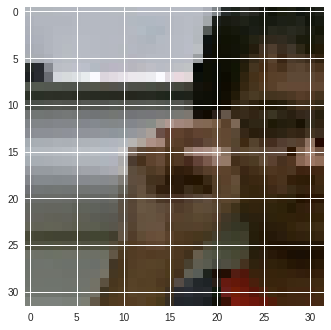

This gesture is fist
Accuracy is : 0.8960396039603961


In [292]:
import math
demo_index=45
demo = X_test[demo_index]
out = predictions_test[demo_index]
plt.imshow(cv2.cvtColor(image[demo_index], cv2.COLOR_BGR2RGB))
plt.show()
if int(round(out[0])) == 1:
  print("This gesture is palm")
elif int(round(out[0])) == 2:
  print("This gesture is opithenar")
elif int(round(out[0])) == 3:
  print("This gesture is fist")
elif int(round(out[0])) == 4:
  print("This gesture is fist")
else:
  print("This gesture is intermidiate status")
        
acc = 0
for i in range(202):
  out = predictions_test[i]
  diff = int(round(out[0])) == y_test[i][0]
  acc += abs(diff)
print("Accuracy is :", acc/202)